# Ejemplo segmentación

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook muestra la segmentación de pacientes

En este caso sólo aplica K-Means en combinación con PCA para reducir la dimensionalidad.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import sklearn
print(sklearn.__version__)
````

# K-means

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas del conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas).

Resultados de ejecutar el algoritmo:

+ Los “centroides” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.

+ Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir, que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez encontrados los centroids se deben analizar para ver cuáles son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Dónde usar K-means

El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que se tenga asumida de los datos.

También puede ayudar a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no se hubieran reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

### Algunos usos:

+ Segmentación por comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
+ Categorización de productos: agrupar productos por actividad en sus ventas
+ Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal.



## Características de las entradas

Las “features” o características que se utilicen como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible. En caso de valores categóricos se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real”.

Es recomendable que los valores utilizados estén **normalizados**, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos.

No conviene utilizar features que estén correlacionados o que sean escalares de otros.

## Funcionamiento de K-means

El algoritmo utiliza una proceso iterativo en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo se debe pasar como entrada el conjunto de datos y un valor de K.

El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroides serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

### PASO 1- Asignación de datos

Cada “fila” del conjunto de datos se asigna al centroide más cercano basado en la distancia cuadrada Euclideana. Se utiliza la siguiente fórmula (donde dist() es la distancia Euclideana standard):

argmin $dist(c_{i},x)^{2}$ con $c_{i} \in C$

### PASO 2 - Actualización de centroide

Los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior.

$c_{i} = \frac{1}{|S_{i}|}\sum_{x_i \in S_i} x_{i}$

El algoritmo itera entre estos pasos hasta cumplir uno de los criterios de detención:

+ Si no hay cambios en los puntos asignados a los grupos,
+ Si la suma de las distancias se minimiza,
+ Se alcanza un número máximo de iteraciones.

# Actividades iniciales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin

import warnings
warnings.filterwarnings('ignore')

## Carga de la data

In [ ]:
!wget https://www.dropbox.com/s/gvxf9ztdy59n1gp/heart.csv

--2024-11-02 20:20:16--  https://www.dropbox.com/s/gvxf9ztdy59n1gp/heart.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/2t4hm96h5yqtoe3zu0mlz/heart.csv?rlkey=rtrmj1ym0ltm76z165e0c3uel [following]
--2024-11-02 20:20:16--  https://www.dropbox.com/scl/fi/2t4hm96h5yqtoe3zu0mlz/heart.csv?rlkey=rtrmj1ym0ltm76z165e0c3uel
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfe37b99182f47958acedee3256.dl.dropboxusercontent.com/cd/0/inline/Cdqogfm6fOiZ_NPUGRM3Ges39g-hDpj1T2kAyyWyGWHb-eEA0vcsfFoHDkb0RaLa9o8fiweV3ppaRWOfxhlH4L9phVP0-8fqkoaeQ80tK-8grQlwF303CasWYjU0-EP2nRC4TUUxeDPSIde8Z-BibTRM/file# [following]
--2024-11-02 20:20:17--  https://ucfe37b99182f47958acedee3256.dl.dropboxusercontent.com/cd/0/inline/Cdqogfm6fO

In [ ]:
data_heart = pd.read_csv("heart.csv")
data_heart.shape

(303, 14)

$\textbf{COMENTARIO}$

Existen 303 observaciones que corresponden a 303 pacientes de los cuales se tienen 14 características o variables.

## Descripción de la data

+ Age : Age of the patient
+ Sex : Sex of the patient
+ exang: exercise induced angina (1 = yes; 0 = no)
+ caa: number of major vessels (0-3)
+ cp : Chest Pain type chest pain type
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
    + Value 4: asymptomatic
+ trtbps : resting blood pressure (in mm Hg)
+ chol : cholestoral in mg/dl fetched via BMI sensor
+ fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
+ rest_ecg : resting electrocardiographic results
    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
+ thalach : maximum heart rate achieved
+ oldpeak : ST depression induced by exercise relative to rest
+ thall : thalassemia (Enfermedad sanguínea caracterizada por cantidades inferiores a las normales de una proteína transportadora de oxígeno)
    + 0 : null
    + 1 : fixed defec
    + 2 : normal
    + 3 : reversable defect
+ slp : the slope of the peak exercise ST segment
    + 0 : unsloping
    + 1 : flat
    + 2 : downsloping
+ output : 0= less chance of heart attack 1= more chance of heart attack
    + 0 : 50% diameter narrowing. less chance of heart disease
    + 1 : 50% diameter narrowing. more chance of heart disease

In [ ]:
data_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Revisión de tipos de variables

In [ ]:
data_heart.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


$\textbf{COMENTARIO}$

Se aprecia la existencia de 14 variables cuantitativas

## Revisión de valores nulos

In [ ]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


$\textbf{COMENTARIO}$

La celda anterior indica la inexistencia de valores nulos

## Análisis de variables

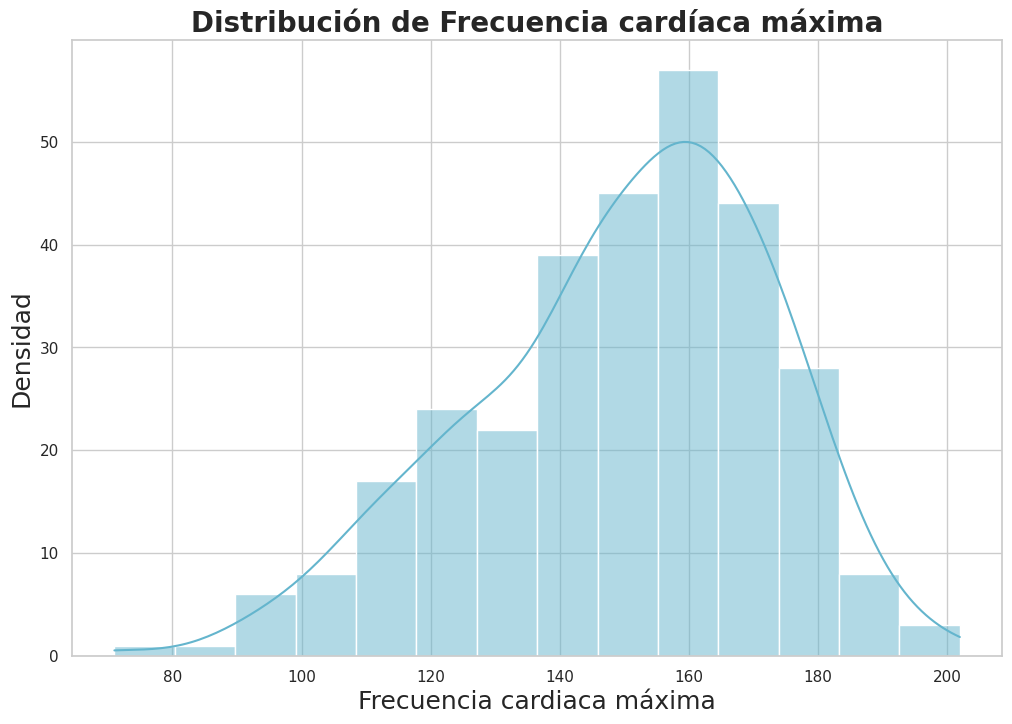

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_heart['thalachh'], kde = True, color = 'c')
plt.title('Distribución de Frecuencia cardíaca máxima', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia cardiaca máxima", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [ ]:
pd.DataFrame(data_heart.thalachh.describe()).T

,count,mean,std,min,25%,50%,75%,max
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


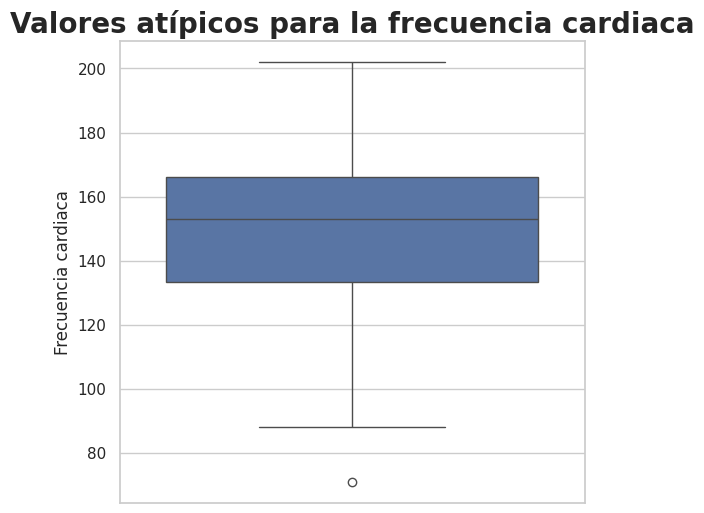

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la frecuencia cardiaca", fontsize=20, fontweight="bold")
plt.ylabel("Frecuencia cardiaca")
sns.boxplot(y='thalachh',data=data_heart);

### Comentarios de la frecuencia cardiaca

+ En promedio los pacientes presentan una frecuencia cardíaca de 149.6 latidos por minuto (lpm)
+ La frecuencia cardiaca máxima registrada es de 202 lpm
+ Se aprecia que existe un valor atípico que corresponde a la frecuencia cardíaca mínima (71 lpm)

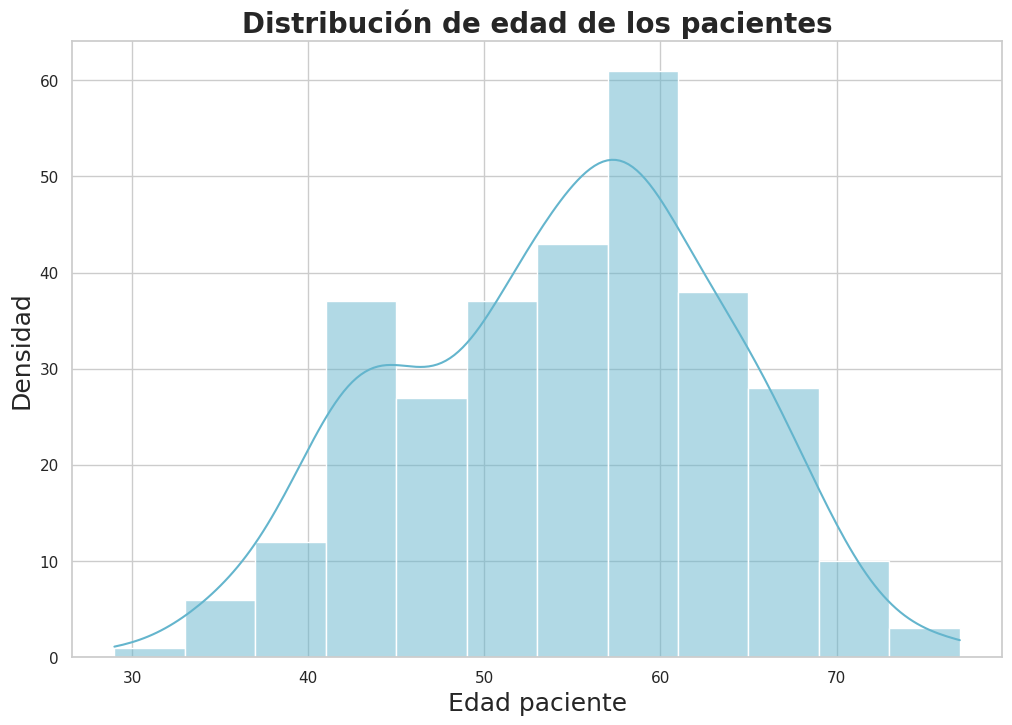

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_heart['age'], kde = True, color = 'c')
plt.title('Distribución de edad de los pacientes', fontsize = 20, fontweight="bold")
plt.xlabel("Edad paciente", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [ ]:
pd.DataFrame(data_heart.age.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0


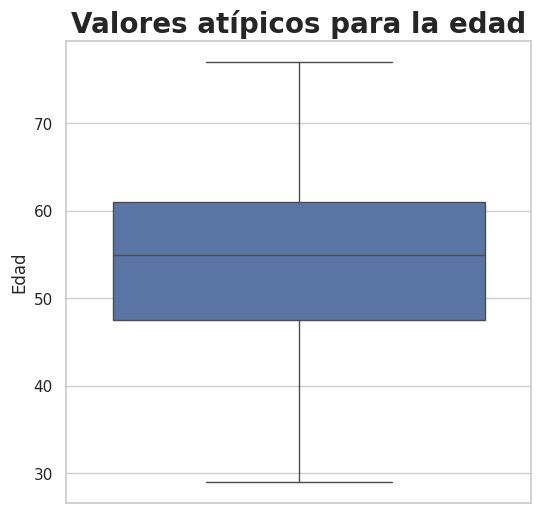

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la edad", fontsize=20, fontweight="bold")
plt.ylabel("Edad")
sns.boxplot(y='age',data=data_heart);

### Comentarios acerca de la edad de los pacientes

+ Paciente con mayor edad tiene 77 años.
+ El 50% de los pacientes tiene 55 años o menos
+ El paciente joven tiene 29 años
+ El promedio de edad de los pacientes es de 54 años aproximadamente.
+ Inexistencia de valores atípicos (outliers)

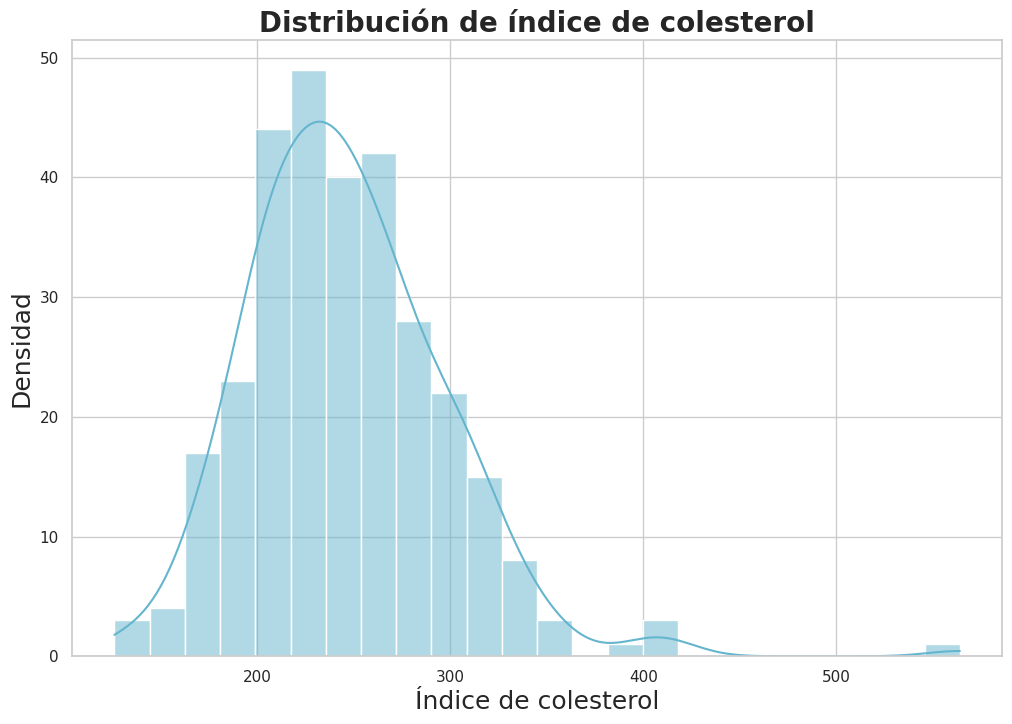

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_heart['chol'], kde = True, color = 'c')
plt.title('Distribución de índice de colesterol', fontsize = 20, fontweight="bold")
plt.xlabel("Índice de colesterol", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [ ]:
pd.DataFrame(data_heart.chol.describe()).T

,count,mean,std,min,25%,50%,75%,max
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0


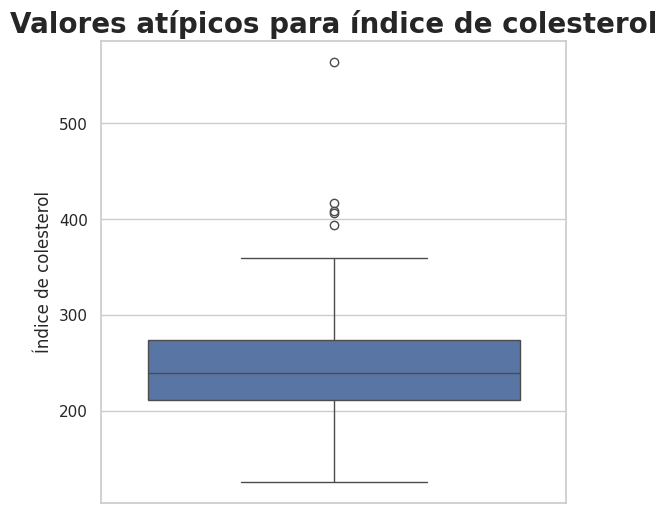

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para índice de colesterol", fontsize=20, fontweight="bold")
sns.boxplot(y='chol',data=data_heart)
plt.ylabel("Índice de colesterol")
plt.show()

In [ ]:
# Identifica los valores atìpicos
IQR = np.quantile(data_heart.chol, 0.75) - np.quantile(data_heart.chol, 0.25)
limite = np.quantile(data_heart.chol, 0.75) + IQR*1.5
data_heart[data_heart.chol > limite]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


### Comentarios acerca del índice de colesterol

+ El valor máximo del índice es de 546 mg/dl (miligramos por decilitro).
+ El promedio es del 246 mg/dl aproximadamente
+ El 75% de los pacientes presenta un índice igual o inferior a 274.5 mg/dl
+ Existen valor atípicos (outliers)

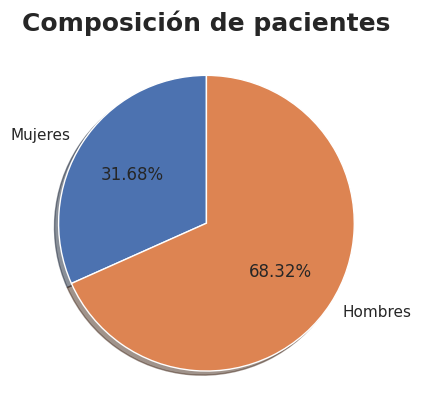

In [ ]:
clases = np.array([data_heart[data_heart.sex == 0].shape[0],
                   data_heart[data_heart.sex == 1].shape[0]])
labels = ['Mujeres', 'Hombres']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Composición de pacientes', fontsize=18, fontweight="bold")
plt.show()

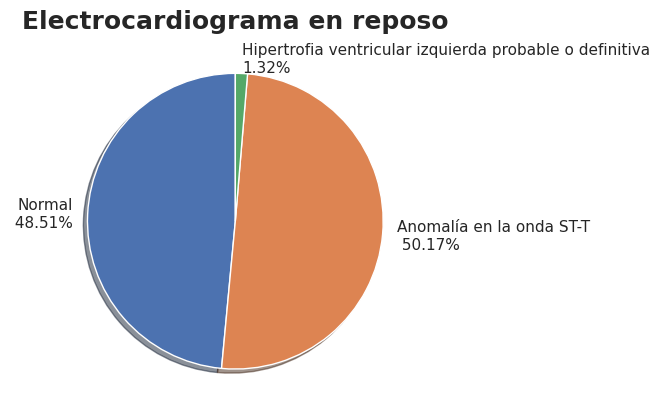

In [ ]:
clases = np.array([data_heart[data_heart.restecg == 0].shape[0],
                   data_heart[data_heart.restecg == 1].shape[0],
                   data_heart[data_heart.restecg == 2].shape[0]
                   ])
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Normal\n ' + labels[0]
labels[1] = 'Anomalía en la onda ST-T\n ' + labels[1]
labels[2] = 'Hipertrofia ventricular izquierda probable o definitiva\n' + labels[2]

plt.pie(clases, labels=labels,
        shadow=True, startangle=90)
plt.title('Electrocardiograma en reposo', fontsize=18, fontweight="bold")
plt.show()

In [ ]:
# Totales por resultado del electrocardiograma en reposo
index = ['Normal', 'Anomalía en la onda ST-T', 'Hipertrofia ventricular izquierda probable o definitiva']
print(pd.DataFrame(data=data_heart.groupby("restecg").size().values.reshape(3,-1),
        index = index, columns = ['Frecuencia']))

                                                    Frecuencia
Normal                                                     147
Anomalía en la onda ST-T                                   152
Hipertrofia ventricular izquierda probable o de...           4


In [ ]:
# Totales por tipo de dolor de pecho
index = ['Angina típica', 'Angina atípica', 'Dolor no anginoso', 'Asintomático']
print(pd.DataFrame(data=data_heart.groupby("cp").size().values.reshape(len(index),-1),
        index = index, columns = ['Frecuencia']))

                   Frecuencia
Angina típica             143
Angina atípica             50
Dolor no anginoso          87
Asintomático               23


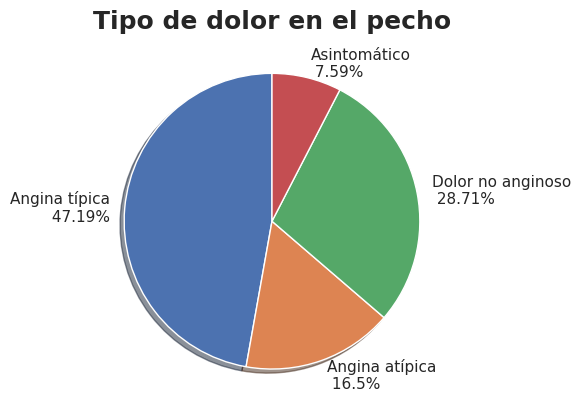

In [ ]:
clases = np.array([data_heart[data_heart.cp == 0].shape[0],
                   data_heart[data_heart.cp == 1].shape[0],
                   data_heart[data_heart.cp == 2].shape[0],
                   data_heart[data_heart.cp == 3].shape[0]
                   ])
values_labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels = ['Angina típica\n ' + values_labels[0],
            'Angina atípica\n ' + values_labels[1],
            'Dolor no anginoso\n ' + values_labels[2],
            'Asintomático\n ' + values_labels[3]
            ]
plt.pie(clases, labels=labels,
        shadow=True, startangle=90)
plt.title('Tipo de dolor en el pecho', fontsize=18, fontweight="bold")
plt.show()

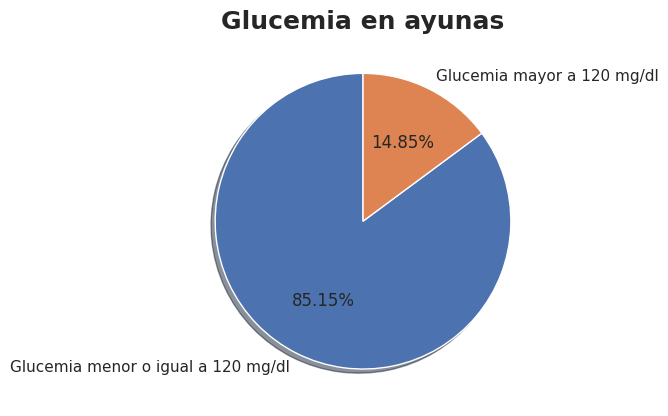

In [ ]:
clases = np.array([data_heart[data_heart.fbs == 0].shape[0],
                   data_heart[data_heart.fbs == 1].shape[0]])
labels = ['Glucemia menor o igual a 120 mg/dl', 'Glucemia mayor a 120 mg/dl']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Glucemia en ayunas', fontsize=18, fontweight="bold")
plt.show()

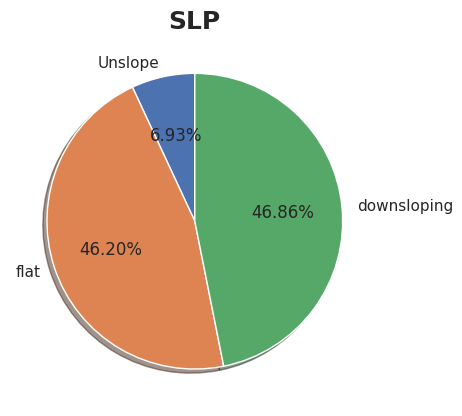

In [ ]:
clases = np.array([data_heart[data_heart.slp == 0].shape[0],
                   data_heart[data_heart.slp == 1].shape[0],
                   data_heart[data_heart.slp == 2].shape[0]
                   ])
labels = ['Unslope', 'flat', 'downsloping']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('SLP', fontsize=18, fontweight="bold")
plt.show()

### Análisis bivariado

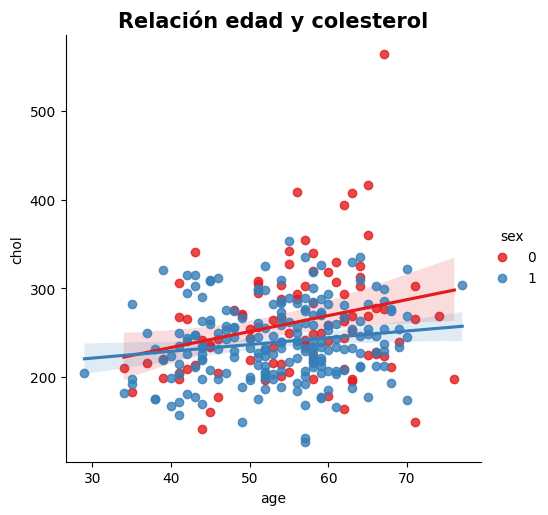

In [ ]:
ax = sns.lmplot(x = 'age', y = 'chol', data=data_heart, hue='sex', palette='Set1')
plt.title("Relación edad y colesterol", fontsize=15, fontweight="bold")
plt.show()

---

**COMENTARIOS DEL GRÁFICO**

---

Este gráfico muestra la relación entre la edad (`age`) y los niveles de colesterol (`chol`) de los pacientes, diferenciando entre los sexos (0 y 1) mediante colores distintos (rojo y azul, respectivamente).

Aquí algunas interpretaciones:

1. **Relación positiva entre edad y colesterol:** a medida que aumenta la edad, también tienden a aumentar los niveles de colesterol en general. Esto se refleja en las líneas de tendencia que van hacia arriba para ambos sexos, lo cual indica una correlación positiva entre la edad y el nivel de colesterol.

2. **Diferencia entre sexos:** la línea de tendencia roja (sexo 0) tiene una pendiente más pronunciada que la azul (sexo 1), lo que sugiere que, en promedio, los niveles de colesterol aumentan a una tasa ligeramente mayor con la edad para el grupo de sexo 0 en comparación con el grupo de sexo 1.

3. **Variabilidad en los niveles de colesterol:** existe una gran dispersión de los valores de colesterol para ambas categorías de sexo, especialmente en el rango de edad de 40 a 60 años. Esto indica que no sólo la edad es un factor para los niveles de colesterol, sino que probablemente hay otros factores en juego, como el estilo de vida, la genética, o condiciones de salud preexistentes.

4. **Puntos atípicos:** existen algunos puntos fuera del rango típico de colesterol, en particular por encima de los 400 mg/dl. Estos valores pueden indicar casos específicos de hipercolesterolemia o condiciones que requieren atención médica especial.

En resumen, el gráfico sugiere una correlación positiva entre la edad y los niveles de colesterol, con diferencias moderadas en la tendencia de crecimiento del colesterol entre los dos grupos de sexo. También destaca la gran variabilidad y algunos puntos extremos que podrían necesitar investigación adicional.

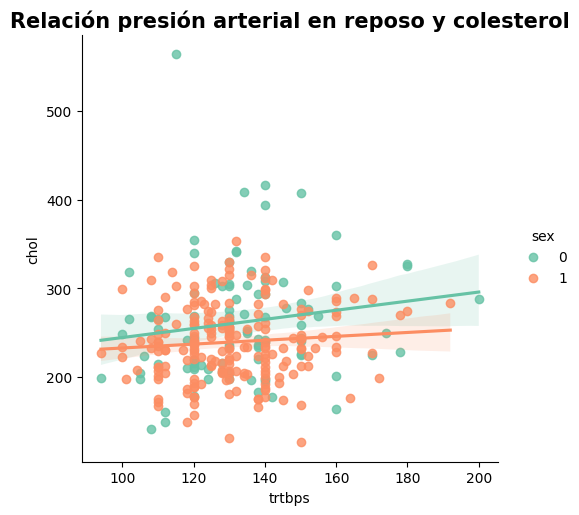

In [ ]:
ax = sns.lmplot(x = 'trtbps', y = 'chol', data=data_heart, hue='sex', palette='Set2')
plt.title("Relación presión arterial en reposo y colesterol", fontsize=15, fontweight="bold")
plt.show()

---

**COMENTARIOS DEL GRÁFICO**

---
Este gráfico muestra la relación entre el nivel de colesterol (`chol`) y la presión arterial en reposo (`trtbps`) de los pacientes, separados por sexo (0 y 1). Aquí algunas interpretaciones clave:

1. **Relación ligera entre colesterol y presión arterial en reposo:** las líneas de tendencia para ambos sexos (en verde para sexo 0 y en naranja para sexo 1) muestran un ligero aumento en el colesterol a medida que aumenta la presión arterial en reposo. Sin embargo, la pendiente es muy baja, lo que sugiere que la relación es débil. Esto indica que la presión arterial en reposo no tiene una influencia fuerte sobre los niveles de colesterol en esta muestra de datos.

2. **Diferencias entre sexos:** las líneas de tendencia muestran un ligero patrón distinto entre ambos sexos. La pendiente de la línea verde (sexo 0) es un poco mayor que la de la línea naranja (sexo 1), lo que podría indicar que en el grupo de sexo 0, el colesterol aumenta ligeramente más en relación con la presión arterial en reposo.

3. **Variabilidad significativa:** la dispersión de puntos es notable en ambos sexos. Esto sugiere que existen muchos otros factores que afectan los niveles de colesterol y la presión arterial en reposo, además de cualquier relación que pueda existir entre ellos.

4. **Puntos atípicos:** se observan algunos puntos muy elevados tanto en colesterol como en presión arterial en reposo, especialmente en el grupo de sexo 0. Estos puntos podrían representar casos anormales o extremos y podrían ser de interés clínico para estudiar condiciones específicas de salud que afectan tanto el colesterol como la presión arterial.

En general, el gráfico sugiere una relación débil entre colesterol y presión arterial en reposo, con diferencias leves entre los sexos y una gran dispersión, indicando que hay otros factores no representados en este gráfico que influyen en ambas variables.

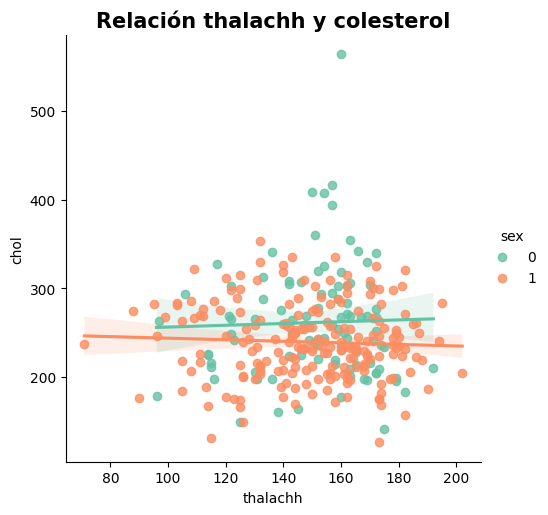

In [ ]:
ax = sns.lmplot(x = 'thalachh', y = 'chol', data=data_heart, hue='sex', palette='Set2')
plt.title("Relación thalachh y colesterol", fontsize=15, fontweight="bold")
plt.show()

---

**COMENTARIOS DEL GRÁFICO**

---

Este gráfico muestra la relación entre el nivel de colesterol (`chol`) y la frecuencia cardíaca máxima alcanzada (`thalachh`), con puntos de datos diferenciados por sexo (0 y 1). Algunas interpretaciones posibles:

1. **Relación casi nula entre colesterol y frecuencia cardíaca máxima:** la tendencia es prácticamente horizontal para ambos sexos, lo cual indica que no hay una relación significativa entre el nivel de colesterol y la frecuencia cardíaca máxima alcanzada. Esto sugiere que los niveles de colesterol no parecen afectar directamente la capacidad de alcanzar una frecuencia cardíaca máxima más alta o más baja en esta muestra.

2. **Diferencias entre sexos:** la línea de tendencia para el sexo 0 (en verde) y el sexo 1 (en naranja) es muy similar, lo que indica que la relación entre estas dos variables es parecida para ambos sexos. Sin embargo, hay una ligera inclinación negativa en el grupo de sexo 1, aunque es mínima y probablemente insignificante.

3. **Variabilidad significativa y puntos atípicos:** la dispersión de los datos es alta, lo cual indica una gran variabilidad en los niveles de colesterol y frecuencias cardíacas máximas. Se observan algunos puntos atípicos en niveles de colesterol elevados, especialmente en el grupo de sexo 0, que podrían representar casos particulares de pacientes con condiciones de salud específicas.

4. **Frecuencia cardíaca máxima alrededor de un rango común:** la mayoría de los pacientes parecen tener una frecuencia cardíaca máxima entre 120 y 180, independientemente de su nivel de colesterol. Esto refuerza la idea de que el colesterol no está fuertemente relacionado con la capacidad de alcanzar frecuencias cardíacas máximas en esta muestra.

En resumen, el gráfico sugiere que no hay una correlación relevante entre el colesterol y la frecuencia cardíaca máxima alcanzada, y que la relación es similar para ambos sexos. La gran dispersión de los datos sugiere que otros factores, no representados aquí, son más relevantes para explicar la variabilidad en estos dos parámetros.

# Modelos de machine learning

## Aprendizaje NO supervisado

Se inicia la aplicación de aprendizaje no supervisado con la creación de un modelo usando KMeans considerando 2 clusters, tomando como base que existen 2 clases de pacientes: aquellos que tienen mayor probabilidad de sufrir un ataque y aquellos que tienen menor probabilidad de sufrir un ataque.

En este experimento inicial se pretende determinar si los grupos que se arman son, más o menos similares, a la agrupación intrínseca de los datos (clase 0 y clase 1). Evidentemente, se oculta esa característica al momento de entrenar el modelo de KMeans.

### Segmentación usando KMeans

Dado que existen 2 grupos de pacientes: lo que presentan mayor chance de sufrir un ataque y lo de menor chance; se opta por crear 2 grupos donde exista similitud de los datos de los pacientes.

In [ ]:
features = data_heart.drop(columns = ['output']).columns
X = data_heart[features]
y = data_heart.output

In [ ]:
model_kmeans = KMeans(n_clusters = 2, random_state=29)
model_kmeans.fit(X)

KMeans(n_clusters=2, random_state=29)

In [ ]:
# Muestra los % de ocurrencias de cada clase considerando la agrupación que hizo el modelo de segmentación
count_0 = list(model_kmeans.labels_).count(0)
count_1 = list(model_kmeans.labels_).count(1)
print("Pacientes Grupo 1 {0} representando un {1:.1f}%".format(count_0, 100*count_0/len(y)))
print("Pacientes Grupo 2 {0} representando un {1:.1f}%".format(count_1, 100*count_1/len(y)))

Pacientes Grupo 1 193 representando un 63.7%
Pacientes Grupo 2 110 representando un 36.3%


In [ ]:
# Muestra los % de ocurrencias de cada clase en la data original
count_0 = list(y).count(0)
count_1 = list(y).count(1)
print("Pacientes con menor chance de sufrir ataque cardiaco {0} representando un {1:.1f}%".format(count_0, 100*count_0/len(y)))
print("Pacientes con mayor chance de sufrir ataque cardiaco {0} representando un {1:.1f}%".format(count_1, 100*count_1/len(y)))

Pacientes con menor chance de sufrir ataque cardiaco 138 representando un 45.5%
Pacientes con mayor chance de sufrir ataque cardiaco 165 representando un 54.5%


In [ ]:
# Revisar el nombre de las columnas disponibles
X.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

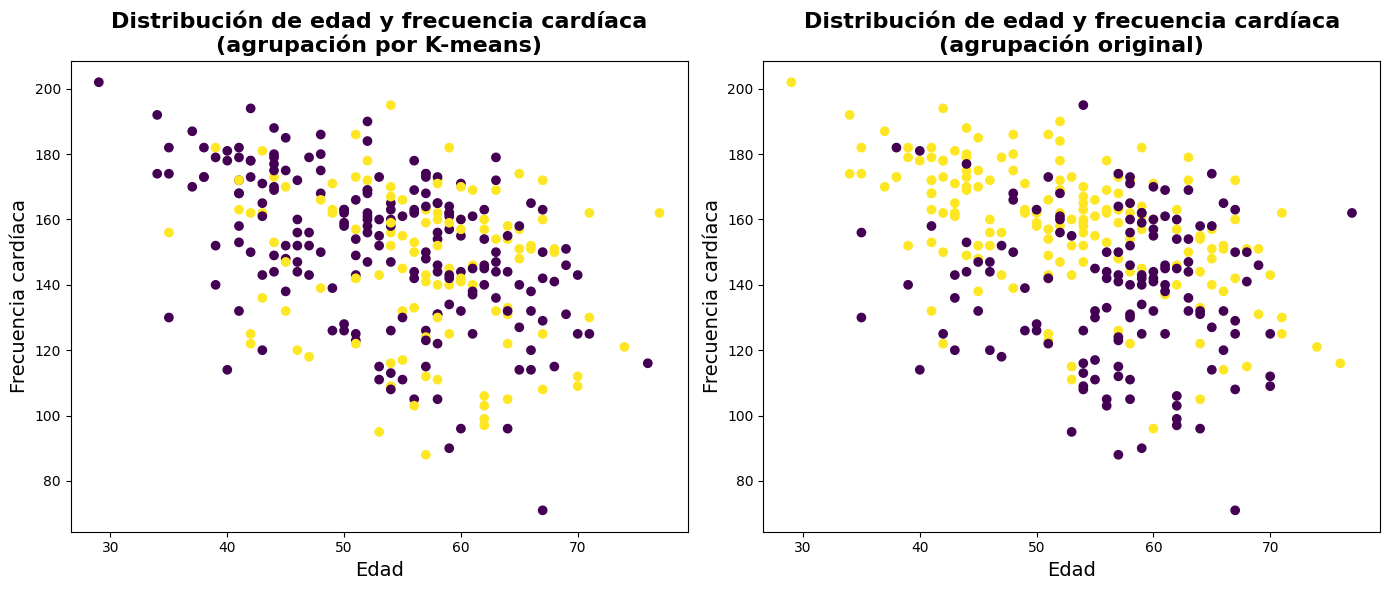

In [ ]:
# Configuración de la figura
plt.figure(figsize=(14, 6))

# Primer gráfico: agrupamiento usando K-means
plt.subplot(1, 2, 1)
plt.scatter(X.age, X.thalachh, c=model_kmeans.labels_)
plt.title("Distribución de edad y frecuencia cardíaca\n(agrupación por K-means)", fontsize=16, fontweight="bold")
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Frecuencia cardíaca", fontsize=14)

# Segundo gráfico: agrupación original
plt.subplot(1, 2, 2)
plt.scatter(X.age, X.thalachh, c=y)
plt.title("Distribución de edad y frecuencia cardíaca\n(agrupación original)", fontsize=16, fontweight="bold")
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Frecuencia cardíaca", fontsize=14)

# Ajuste y visualización
plt.tight_layout()
plt.show()

In [ ]:
# Consolida los datos considerando el resultado de kmeans
grouped_data = pd.DataFrame(X, columns = X.columns)
grouped_data['grupo'] = model_kmeans.labels_

In [ ]:
data_heart[data_heart.output == 0][['age', 'thalachh']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0
thalachh,138.0,139.101449,22.598782,71.0,125.0,142.0,156.0,195.0


In [ ]:
data_heart[data_heart.output == 1][['age', 'thalachh']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0
thalachh,165.0,158.466667,19.174276,96.0,149.0,161.0,172.0,202.0


In [ ]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 0][['age', 'thalachh']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,193.0,53.062176,9.282952,29.0,45.0,54.0,60.0,76.0
thalachh,193.0,151.818653,22.494519,71.0,139.0,155.0,169.0,202.0


In [ ]:
grouped_data[grouped_data.grupo == 1][['age', 'thalachh']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,110.0,56.654545,8.273353,35.0,51.25,57.0,62.0,77.0
thalachh,110.0,145.836364,23.222706,88.0,130.25,151.0,162.0,195.0


$\textbf{Comentarios}$

+ Considerando las características de edad y frecuencia cardíaca máxima existe cierta similitud de estas medidas entre los grupos originales y los propuestos por el modelo de segmentación

### Análisis usando normalización

Anteriormente, se mencionó que lo ideal es que los datos se encuentren normalizados, por lo tanto se procede a normalizar usando 3 métodos distintos

In [ ]:
# Función para aplicar scaler
def rescale_data(df : pd.DataFrame, scaler : TransformerMixin):
    """
    Rec
    ibe un dataframe y un método de escalamiento de variables.
    Retorna un dataframe con las variables escaladas utilizando el método especificado.
    """
    features_names = df.columns
    if scaler != None:
        features_rescaled = scaler.fit_transform(df) # Transformamos los datos utilizando un método de escalamiento.
        return pd.DataFrame(features_rescaled,columns=features_names)
    else:
        return df

In [ ]:
def view_class(labels : np.array, y : np.array):
  # Muestra los % de ocurrencias de cada clase considerando la agrupación que hizo el modelo de segmentación
  count_0 = list(labels).count(0)
  count_1 = list(labels).count(1)
  print("Pacientes Grupo 1 {0} representando un {1:.1f}%".format(count_0, 100*count_0/len(y)))
  print("Pacientes Grupo 2 {0} representando un {1:.1f}%".format(count_1, 100*count_1/len(y)))

In [ ]:
def view_graphs(model_kmeans : KMeans, X : pd.DataFrame, columns : np.array, labels_columns : np.array, original_label : np.array):
  # Configuración de la figura
  plt.figure(figsize=(14, 6))

  # Primer gráfico: agrupamiento usando K-means
  plt.subplot(1, 2, 1)
  plt.scatter(X[columns[0]], X[columns[1]], c=model_kmeans.labels_)
  plt.title("Distribución de edad y frecuencia cardíaca\n(agrupación por K-means)", fontsize=16, fontweight="bold")
  plt.xlabel(labels_columns[0], fontsize=14)
  plt.ylabel(labels_columns[1], fontsize=14)

  # Segundo gráfico: agrupación original
  plt.subplot(1, 2, 2)
  plt.scatter(X[columns[0]], X[columns[1]], c=original_label)
  plt.title("Distribución de edad y frecuencia cardíaca\n(agrupación original)", fontsize=16, fontweight="bold")
  plt.xlabel(labels_columns[0], fontsize=14)
  plt.ylabel(labels_columns[1], fontsize=14)

  # Ajuste y visualización
  plt.tight_layout()
  plt.show()

#### MinMaxScaler

In [ ]:
features_minmax = rescale_data(data_heart[features], MinMaxScaler())

In [ ]:
features_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,0.528465,0.189210,0.0,0.385417,0.541667,0.666667,1.0
sex,303.0,0.683168,0.466011,0.0,0.000000,1.000000,1.000000,1.0
cp,303.0,0.322332,0.344017,0.0,0.000000,0.333333,0.666667,1.0
trtbps,303.0,0.354941,0.165454,0.0,0.245283,0.339623,0.433962,1.0
chol,303.0,0.274575,0.118335,0.0,0.194064,0.260274,0.339041,1.0
fbs,303.0,0.148515,0.356198,0.0,0.000000,0.000000,0.000000,1.0
restecg,303.0,0.264026,0.262930,0.0,0.000000,0.500000,0.500000,1.0
thalachh,303.0,0.600358,0.174849,0.0,0.477099,0.625954,0.725191,1.0
exng,303.0,0.326733,0.469794,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,303.0,0.167678,0.187270,0.0,0.000000,0.129032,0.258065,1.0


In [ ]:
model_kmeans_x = KMeans(n_clusters = 2, random_state=29)
model_kmeans_x.fit(features_minmax)

KMeans(n_clusters=2, random_state=29)

In [ ]:
view_class(model_kmeans_x.labels_, y)

Pacientes Grupo 1 204 representando un 67.3%
Pacientes Grupo 2 99 representando un 32.7%


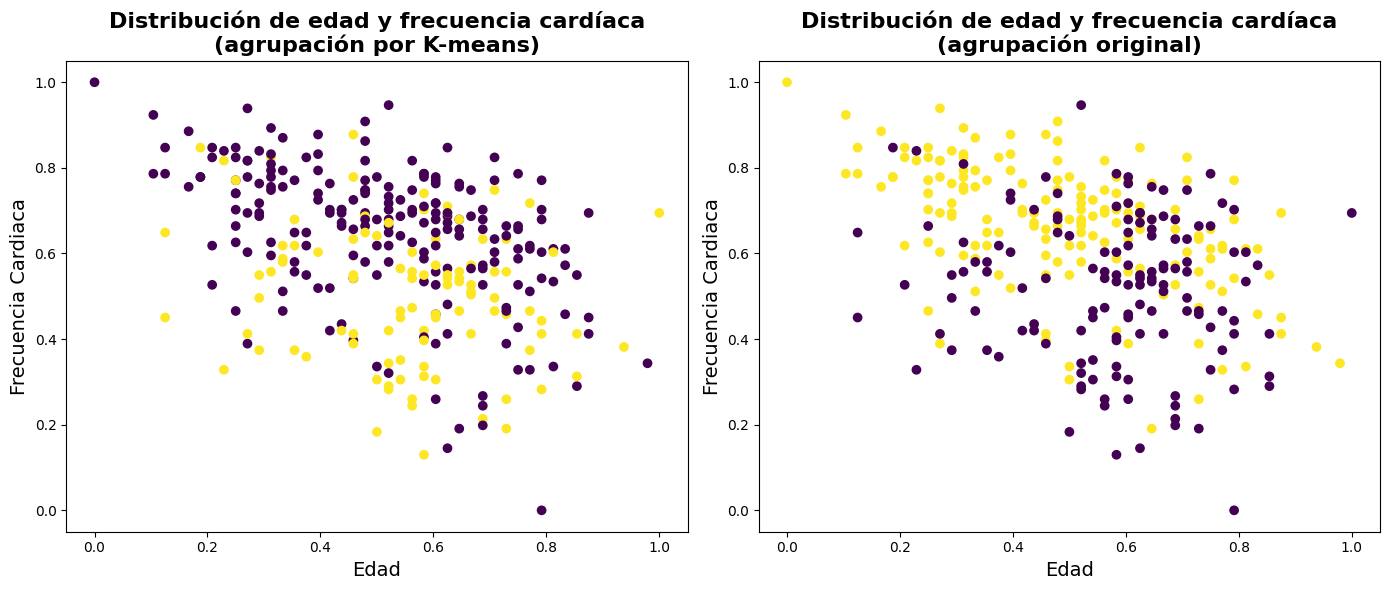

In [ ]:
view_graphs(model_kmeans_x, features_minmax, ["age", "thalachh"], ["Edad", "Frecuencia Cardiaca"], y)

#### StandardScaler

In [ ]:
features_sc = rescale_data(data_heart[features], StandardScaler())

In [ ]:
model_kmeans_y = KMeans(n_clusters = 2, random_state=29)
model_kmeans_y.fit(features_sc)

KMeans(n_clusters=2, random_state=29)

In [ ]:
view_class(model_kmeans_y.labels_, y)

Pacientes Grupo 1 108 representando un 35.6%
Pacientes Grupo 2 195 representando un 64.4%


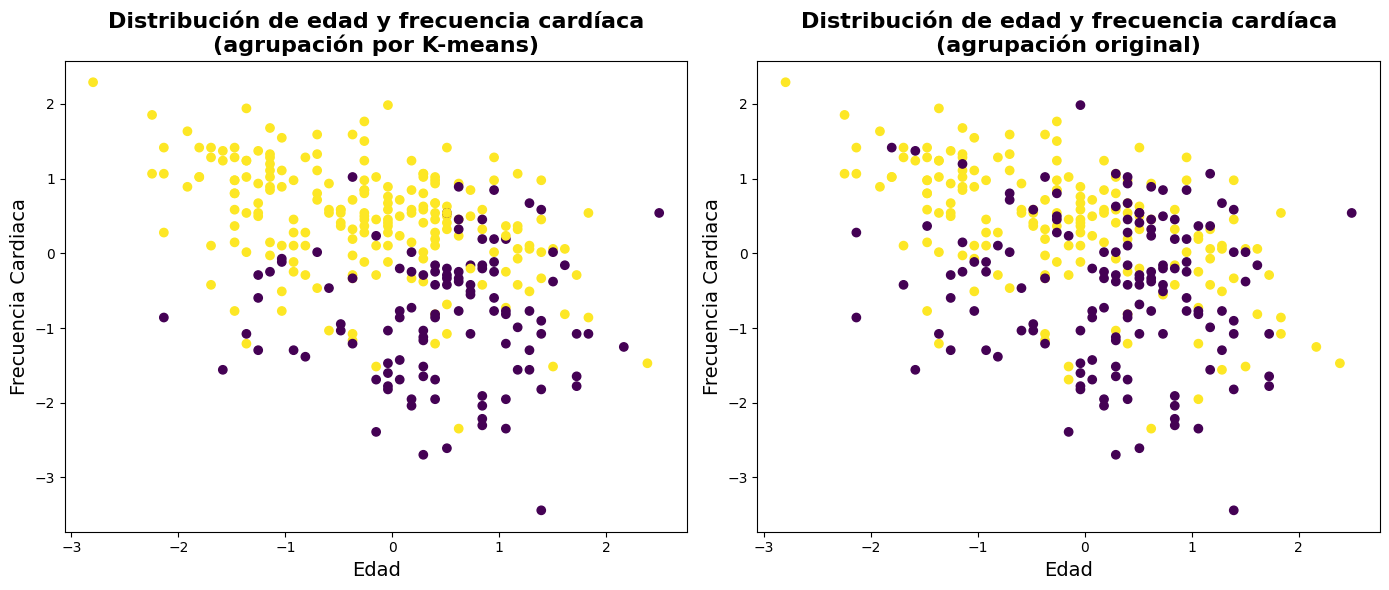

In [ ]:
view_graphs(model_kmeans_y, features_sc, ["age", "thalachh"], ["Edad", "Frecuencia Cardiaca"], y)

#### RobustScaler

In [ ]:
features_rs = rescale_data(data_heart[features], RobustScaler())

In [ ]:
model_kmeans_z = KMeans(n_clusters = 2, random_state=29)
model_kmeans_z.fit(features_rs)

KMeans(n_clusters=2, random_state=29)

In [ ]:
view_class(model_kmeans_z.labels_, y)

Pacientes Grupo 1 195 representando un 64.4%
Pacientes Grupo 2 108 representando un 35.6%


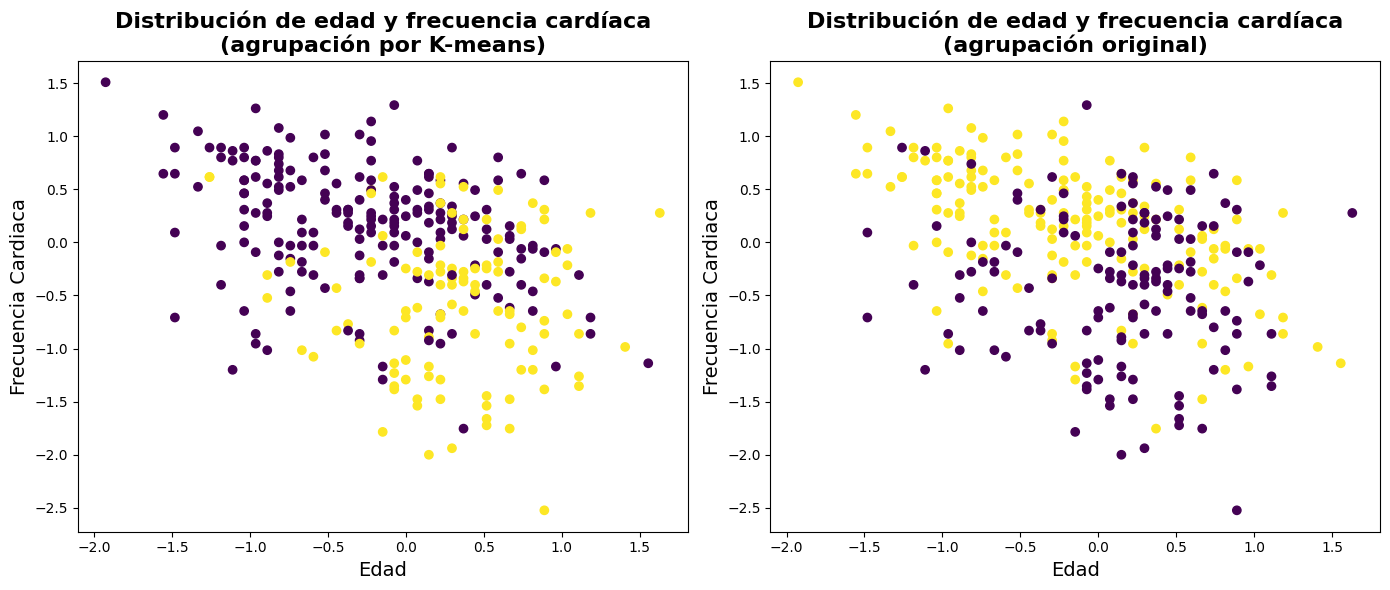

In [ ]:
view_graphs(model_kmeans_z, features_rs, ["age", "thalachh"], ["Edad", "Frecuencia Cardiaca"], y)

#### Aplicación PCA

Dado que las características presentan escalas distintas se aplicará escalamiento antes de aplicar la reducción de la dimensionalidad.

In [ ]:
# Recordar los nombres de las variables
features

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [ ]:
# Se escalan los datos para poder trabajar con ellos en PCA
features_rs_PCA = rescale_data(data_heart[features], RobustScaler())

In [ ]:
# Aplica reducción de la dimensionalidad
pca_data_heart = PCA(n_components=len(features))
pca_data_heart.fit_transform(features_rs_PCA)

array([[ 0.22668112,  1.28457706,  0.80638317, ..., -0.76463547,
         0.08550785,  0.38480038],
       [-0.58314335,  0.49957603,  1.07366285, ..., -0.40138303,
        -0.27905677, -0.11459485],
       [-1.29229301,  0.05104474,  0.05780989, ...,  0.94712242,
         0.13649156,  0.15599838],
       ...,
       [ 2.0362914 , -0.36408779,  0.56683632, ..., -0.18236821,
        -0.21579471,  0.97541914],
       [ 0.60869945, -0.91202571,  1.58183192, ..., -0.11359123,
         0.13829516, -0.18156925],
       [-0.28857104, -0.13335781, -0.61229754, ..., -0.21204909,
        -0.03644466, -0.26064811]])

In [ ]:
pca_data_heart.components_

array([[ 3.22047805e-01,  3.35089156e-02, -1.29790488e-01,
         3.03549679e-01,  1.70492954e-01,  4.68868486e-02,
        -7.76964268e-02, -3.26155501e-01,  1.42944811e-01,
         3.63824815e-01, -2.31580260e-01,  6.42955535e-01,
         1.50569135e-01],
       [ 1.70898004e-01, -1.24652071e-01,  7.88946976e-02,
         6.57265362e-01,  3.65086301e-01,  2.40884036e-02,
        -8.41750166e-02,  9.73317236e-03,  1.49868277e-02,
         1.19250253e-01, -1.21533657e-01, -5.88717488e-01,
        -1.34625166e-02],
       [-5.37534994e-02,  9.14888957e-02, -1.16296574e-01,
        -2.42982819e-01, -4.17371413e-01, -5.23982909e-02,
         5.10963309e-02, -4.01360050e-01,  1.86086777e-01,
         4.26284197e-01, -4.21790970e-01, -4.20163897e-01,
         6.88314595e-02],
       [ 7.51521884e-02, -9.45309333e-02, -1.61241627e-01,
        -5.70881439e-01,  7.48276240e-01, -7.03793943e-02,
        -6.07000691e-02, -1.58315550e-01,  9.80677859e-02,
         1.09762168e-02, -3.55648172e

In [ ]:
# Varianzas explicadas
pca_data_heart.explained_variance_

array([1.45430463, 0.82907654, 0.74802708, 0.63262592, 0.44591203,
       0.36517993, 0.29082809, 0.27031814, 0.19744731, 0.18128757,
       0.16219122, 0.13332813, 0.10847345])

In [ ]:
pca_data_heart.explained_variance_ratio_

array([0.24992346, 0.14247749, 0.12854908, 0.10871729, 0.07663035,
       0.06275647, 0.04997905, 0.0464544 , 0.03393148, 0.03115442,
       0.0278727 , 0.02291255, 0.01864125])

In [ ]:
def plotting_variances(X_features):
  # Plotting the variances for each PC
  pca = PCA()
  principal_components = pca.fit_transform(X_features)
  PC = range(1, pca.n_components_+1)
  plt.bar(PC, pca.explained_variance_ratio_, color='blue')
  plt.xlabel('Componentes principales')
  plt.ylabel('Varianza %')
  plt.xticks(PC)
  plt.title("Varianza utilizando varios componentes", fontsize=18, fontweight="bold")
  plt.show()

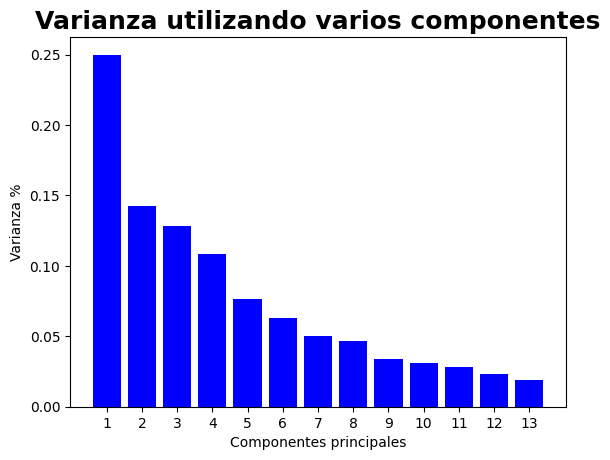

In [ ]:
# Revisa las varianzas explicadas por los componentes
plotting_variances(features_rs_PCA)

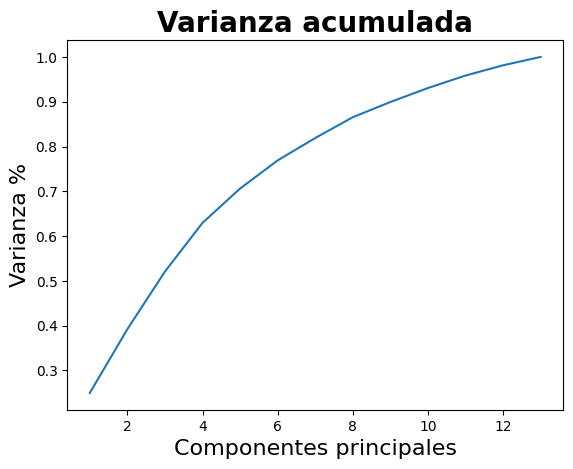

In [ ]:
plt.plot(
    range(1,len(pca_data_heart.explained_variance_ratio_)+1),
    np.cumsum(pca_data_heart.explained_variance_ratio_)
)
plt.title("Varianza acumulada", fontsize = 20, fontweight = "bold")
plt.xlabel('Componentes principales', fontsize=16)
plt.ylabel('Varianza %', fontsize=16)
plt.show()

In [ ]:
X.iloc[:,:11].columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp'],
      dtype='object')

$\textbf{COMENTARIOS}$

+ El gráfico anterior indica que la varianza se explica con sólo 11 componentes.
+ Las variables que explican la varianza son: $\textit{edad, género, tipo de dolor torácico y presión arterial en reposo, nivel de colesterol, entre otras}$

$\textbf{APLICANDO KMEANS USANDO EL RESULTADO DE PCA}$

A continuación se vuelve a aplicar KMEANS para segmentar a los pacientes considerando 2 grupos, manteniendo la hipótesis inicial que indica la separación de los pacientes con menor o mayor riesgo de sufir un ataque cardíaco.

In [ ]:
kmeans_model_with_pca = KMeans(n_clusters = 2, random_state=29)
kmeans_model_with_pca.fit(features_rs_PCA.iloc[:,:11])
labels = kmeans_model_with_pca.predict(features_rs_PCA.iloc[:,:11])
# Muestra los % de ocurrencias de cada clase considerando la agrupación que hizo el modelo de segmentación
count_0 = list(kmeans_model_with_pca.labels_).count(0)
count_1 = list(kmeans_model_with_pca.labels_).count(1)
print("Pacientes Grupo 1 -> {0} representando un {1:.1f}%".format(count_0, 100*count_0/len(y)))
print("Pacientes Grupo 2 -> {0} representando un {1:.1f}%".format(count_1, 100*count_1/len(y)))

Pacientes Grupo 1 -> 186 representando un 61.4%
Pacientes Grupo 2 -> 117 representando un 38.6%


In [ ]:
# Consolida los datos considerando el resultado de kmeans
grouped_data_with_pca = pd.DataFrame(X.iloc[:,:11], columns = X.iloc[:,:11].columns)
grouped_data_with_pca['grupo'] = kmeans_model_with_pca.labels_

$\textbf{Análisis de los grupos armados por KMEANS usando PCA}$

A continuación se analizan los grupos que armó el modelo de segmentación, usando las características que explican la varianza.

In [ ]:
grouped_data_with_pca[grouped_data_with_pca.grupo == 0][['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,186.0,50.510753,8.335038,29.0,44.00,51.0,57.00,71.0
sex,186.0,0.682796,0.466644,0.0,0.00,1.0,1.00,1.0
cp,186.0,1.118280,0.968135,0.0,0.00,1.0,2.00,3.0
trtbps,186.0,124.946237,13.444875,94.0,115.50,125.0,134.00,172.0
chol,186.0,233.274194,42.586447,126.0,204.00,230.5,257.75,354.0
fbs,186.0,0.123656,0.330077,0.0,0.00,0.0,0.00,1.0
restecg,186.0,0.596774,0.491869,0.0,0.00,1.0,1.00,1.0
thalachh,186.0,159.462366,18.181404,96.0,150.25,162.0,172.00,202.0
exng,186.0,0.198925,0.400269,0.0,0.00,0.0,0.00,1.0
oldpeak,186.0,0.562366,0.785877,0.0,0.00,0.1,1.00,3.8


In [ ]:
grouped_data_with_pca[grouped_data_with_pca.grupo == 1][['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,117.0,60.495726,6.497511,42.0,56.0,61.0,65.0,77.0
sex,117.0,0.683761,0.467008,0.0,0.0,1.0,1.0,1.0
cp,117.0,0.726496,1.087737,0.0,0.0,0.0,2.0,3.0
trtbps,117.0,142.239316,18.092506,100.0,130.0,140.0,150.0,200.0
chol,117.0,266.914530,58.317291,131.0,229.0,266.0,298.0,564.0
fbs,117.0,0.188034,0.392420,0.0,0.0,0.0,0.0,1.0
restecg,117.0,0.418803,0.560777,0.0,0.0,0.0,1.0,2.0
thalachh,117.0,134.042735,20.943435,71.0,120.0,137.0,148.0,195.0
exng,117.0,0.529915,0.501251,0.0,0.0,1.0,1.0,1.0
oldpeak,117.0,1.798291,1.256568,0.0,1.0,1.6,2.6,6.2


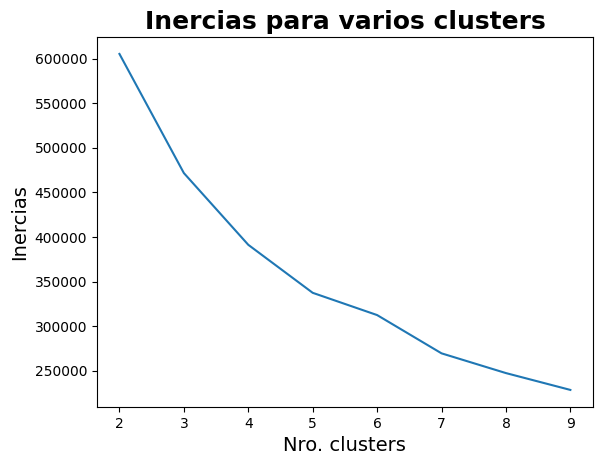

In [ ]:
inertias = []
n_clusters_iterable = range(2,10)
for n_clusters in n_clusters_iterable:
    model_kmeans = KMeans(n_clusters=n_clusters) # Instanciamos el algoritmo de k-means
    model_kmeans.fit(X.iloc[:,:11]) # Ajustamos el modelo de k-means
    inertias.append(model_kmeans.inertia_) # Esta la dispersión de nuestros grupos

plt.plot(n_clusters_iterable, inertias)
plt.title("Inercias para varios clusters", fontsize=18, fontweight = "bold")
plt.xlabel("Nro. clusters", fontsize=14)
plt.ylabel("Inercias", fontsize=14)
plt.show()

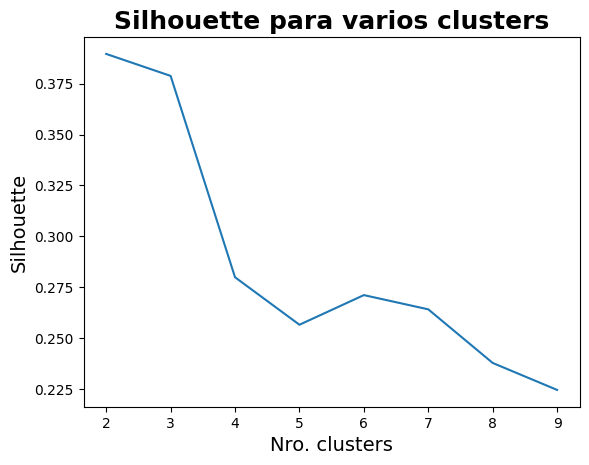

In [ ]:
silhouette_scores = []
n_clusters_iterable = range(2,10)
for n_clusters in n_clusters_iterable:
    model_kmeans = KMeans(n_clusters=n_clusters) # Instanciamos el algoritmo de k-means
    model_kmeans.fit(X.iloc[:,:11]) # Ajustamos el modelo de k-means
    # Esta la dispersión de nuestros grupos
    silhouette_scores.append(silhouette_score(X.iloc[:,:11], model_kmeans.labels_))

plt.plot(n_clusters_iterable, silhouette_scores)
plt.title("Silhouette para varios clusters", fontsize=18, fontweight = "bold")
plt.xlabel("Nro. clusters", fontsize=14)
plt.ylabel("Silhouette", fontsize=14)
plt.show()

$\textbf{COMENTARIOS INDICE SILHOUETTE}$

+ Si el valor de la silueta está cerca de 1, la muestra está bien agrupada y ya está asignada a un grupo muy apropiado.
+ Si el valor de la silueta está cerca de 0, la muestra podría asignarse a otro grupo más cercano y la muestra se encuentra igualmente lejos de ambos grupos. Eso significa que indica clústeres superpuestos
+ Si el valor de silueta está cerca de –1, la muestra está mal clasificada y simplemente se coloca en algún lugar entre los grupos.
+ Considerando lo anterior, y de acuerdo con el gráfico anterior, el número de cluster ideal, usando el índice de silhouette, es 2

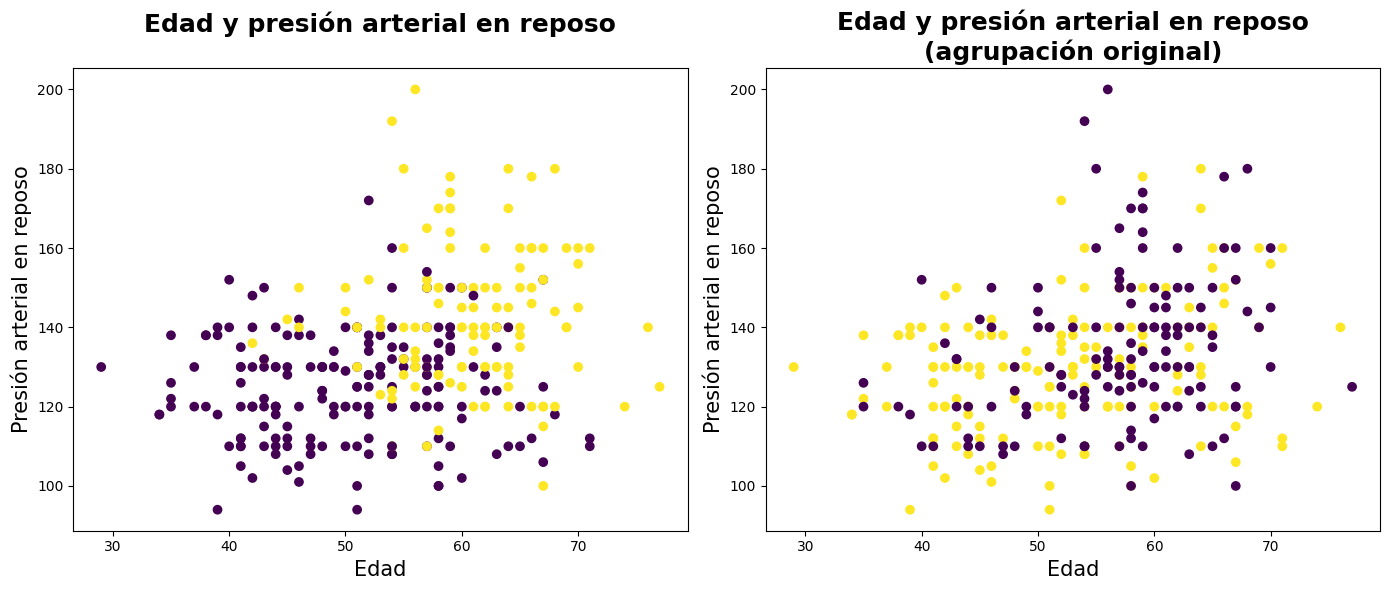

In [ ]:
# Configuración de la figura
plt.figure(figsize=(14, 6))

# Primer gráfico: agrupamiento usando K-means
plt.subplot(1, 2, 1)
plt.scatter(X.age, X.trtbps, c = kmeans_model_with_pca.labels_)
plt.title("Edad y presión arterial en reposo\n", fontsize=18,
                fontweight="bold")
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Presión arterial en reposo", fontsize=15)

# Segundo gráfico: agrupación original
plt.subplot(1, 2, 2)
plt.scatter(X.age, X.trtbps, c = y)
plt.title("Edad y presión arterial en reposo\n(agrupación original)", fontsize=18, fontweight="bold")
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Presión arterial en reposo", fontsize=15)

# Ajuste y visualización
plt.tight_layout()
plt.show()

$\textbf{COMENTARIOS}$

+ Al observar la relación entre edad y presión arterial en reposo para la agrupación usando PCA se visualiza una separación más clara de los pacientes considerados en cada grupo
+ Si se observa la agrupación inicial de paciente con menor o mayor riesgo, el "grupo" no está tan separado.
+ Lo anterior sólo es una apreciación considerando que en ningún momento la separación que hace KMeans indica el menor o mayor riesgo de sufrir un ataque; sólo se observa la relación que existe entre las 2 variables seleccionadas.

# Conclusiones

+ La data seleccionada ya estaba preparada considerando la inexistencia de valores nulos y todas las columnas que son consideradas categóricas (por la naturaleza de sus valores) ya estaban codificadas. Esto facilita bastante el desarrollo del proyecto, dado que el tiempo que eso implica es importante.

+ Inicialmente se aplica KMeans para armar (sesgadamente) los mismos 2 grupos con los cuales vienen los datos; se buscaba averiguar si, desconociendo el grupo al que pertenecen los pacientes, el modelo era capaz de "separar" a los pacientes de la misma forma como vienen "agrupados" en la data original.

+ De manera extra, se aplican técnicas para "averiguar" el número óptimo de K, llegando a valores distintos dependiendo de la técnica que se aplique; esto se debería utilizar olvidando un poco la idea inicial de querer agrupar a los pacientes en solo 2 grupos.

+ Se aplica PCA para poder reducir la cantidad de características a considerar; recordar que se tienen 13 y quizás no todas ellas eran un aporte para explicar la varianza de los datos.

+ Finalmente y a modo de experimentación, se vuelve a realizar segmentación usando la propuesta que entrega PCA respecto de los componentes que explican la mayor parte de la varianza.

+ Todo lo obtenido usando los distintos modelos del Machine Learning deben ser validados/respaldados con el especialista del área; dado que existen consideraciones importantes dese el punto de vista médico que resultan un poco dificil de, muchas veces, ser detectados con las técnicas de inteligencia artificial.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07f23d1d-551e-4d12-aca9-35e44a5bac4b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>